In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


In [7]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
df1 = df[['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income','cb_person_cred_hist_length','credit_score','previous_loan_defaults_on_file','loan_status']]

In [9]:
df1.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,35000.0,0.49,3.0,561,No,1
1,21.0,12282.0,0,1000.0,0.08,2.0,504,Yes,0
2,25.0,12438.0,3,5500.0,0.44,3.0,635,No,1
3,23.0,79753.0,0,35000.0,0.44,2.0,675,No,1
4,24.0,66135.0,1,35000.0,0.53,4.0,586,No,1


In [10]:
df1.isnull().sum()

person_age                        0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

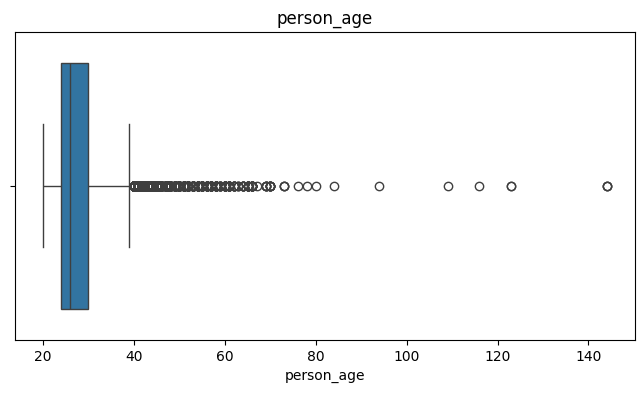

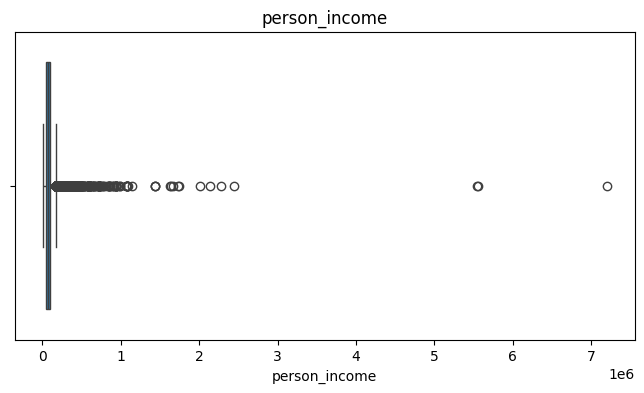

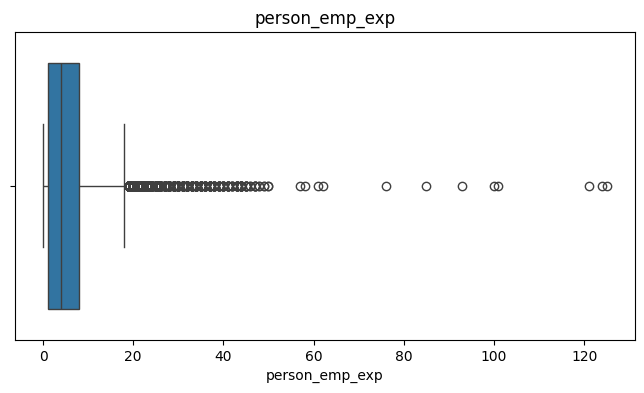

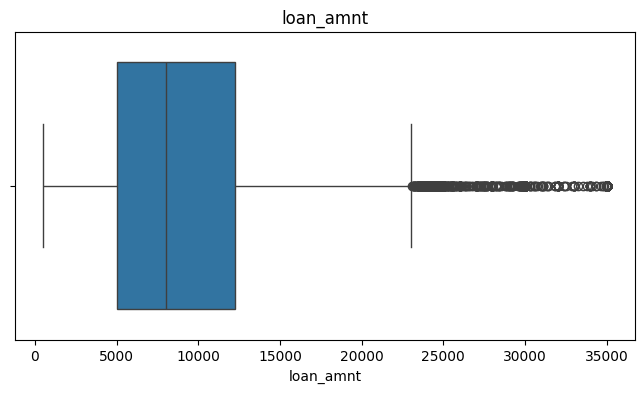

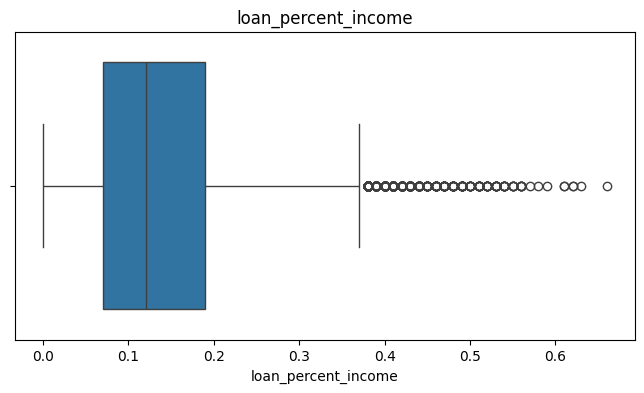

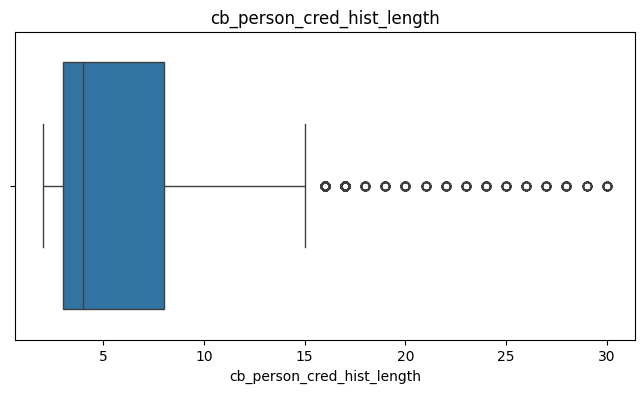

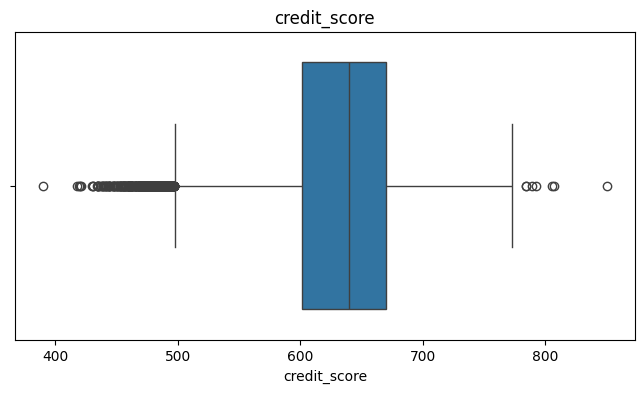

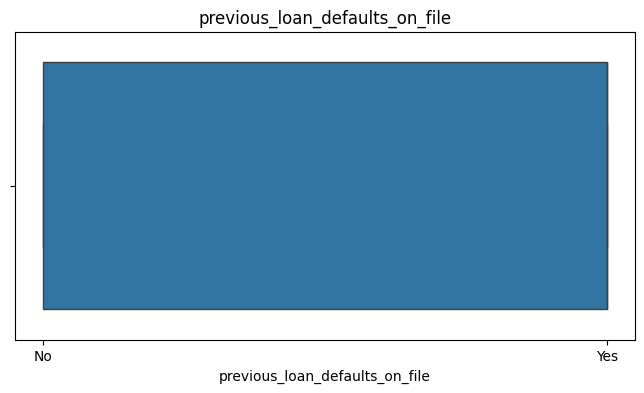

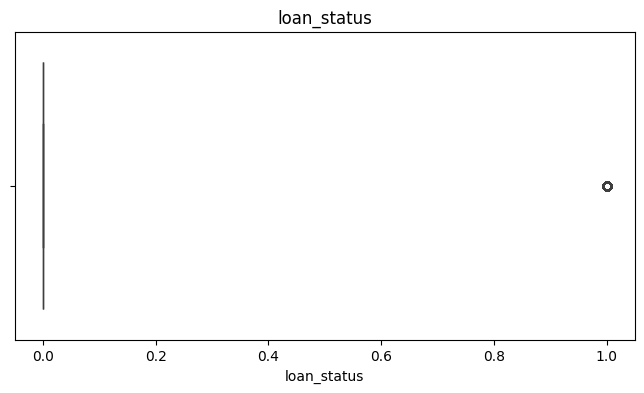

In [11]:
columns = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score",
    "previous_loan_defaults_on_file",
    "loan_status"
]

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col], orient='h')
    plt.title(col)
    plt.show()


In [12]:
num_columns = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score"
]

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
for col in num_columns:
    outliers = detect_outliers(df1, col)
    print(f"Outliers in {col}: {len(outliers)} rows")


Outliers in person_age: 2188 rows
Outliers in person_income: 2218 rows
Outliers in person_emp_exp: 1724 rows
Outliers in loan_amnt: 2348 rows
Outliers in loan_percent_income: 744 rows
Outliers in cb_person_cred_hist_length: 1366 rows
Outliers in credit_score: 467 rows


In [13]:
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Define numerical columns
num_columns = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score"
]

# Apply outlier removal for each numerical column
df1_cleaned = df1.copy()
for col in num_columns:
    df1_cleaned = remove_outliers(df1_cleaned, col)

# Display the cleaned dataset info
print(f"Original dataset size: {df1.shape[0]} rows")
print(f"Cleaned dataset size: {df1_cleaned.shape[0]} rows")


Original dataset size: 45000 rows
Cleaned dataset size: 36135 rows


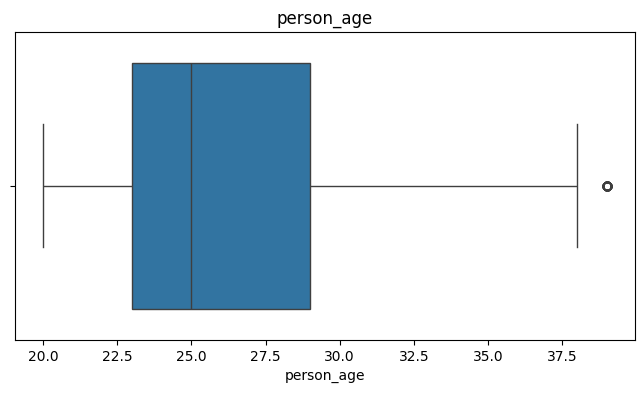

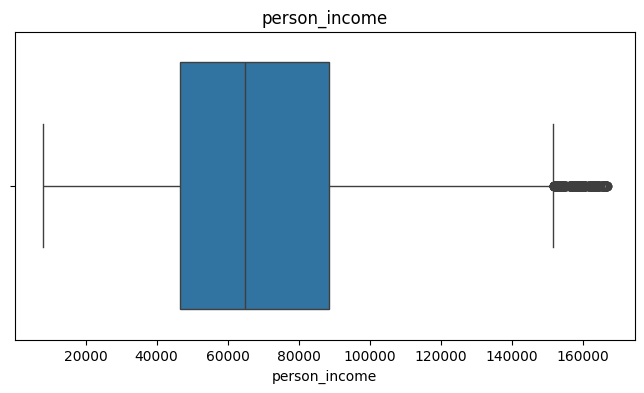

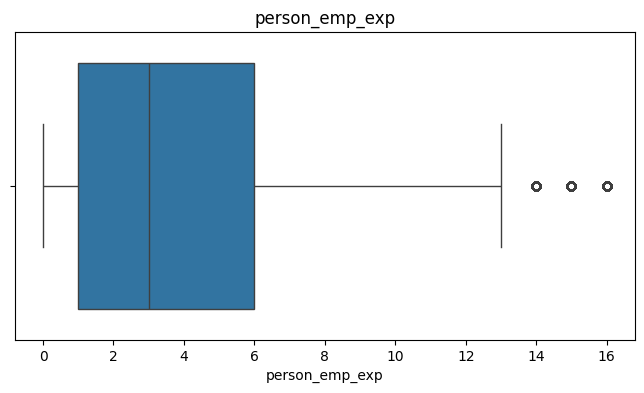

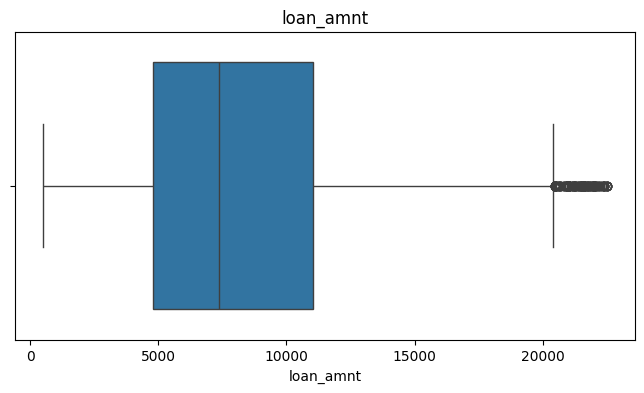

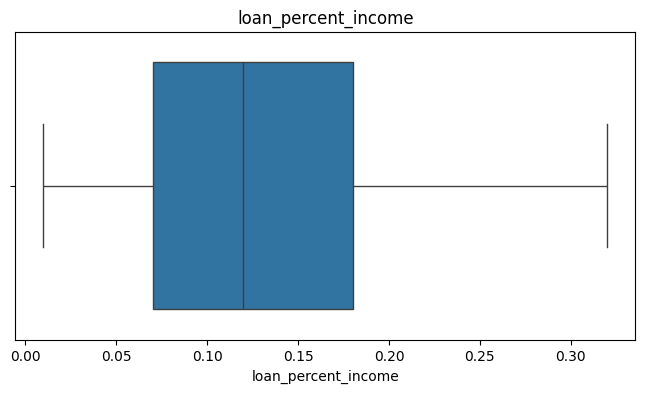

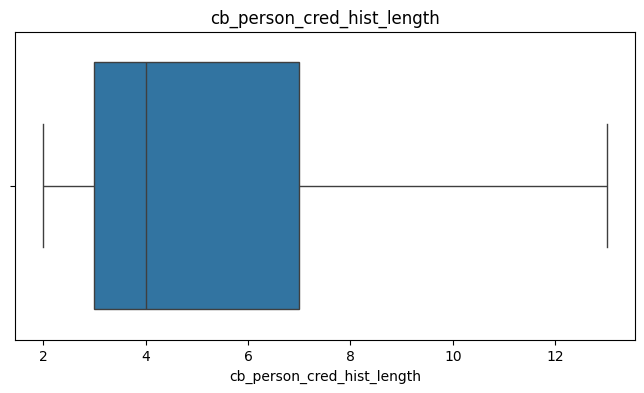

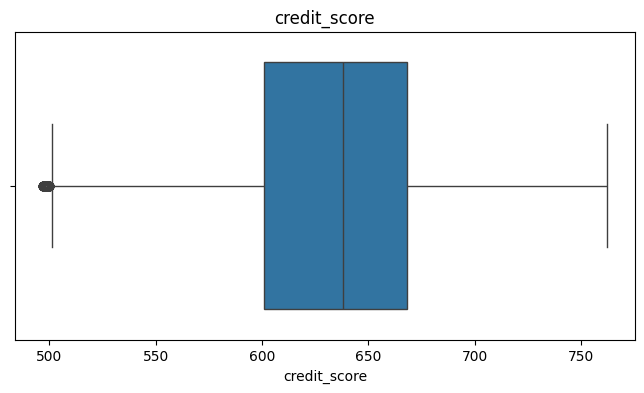

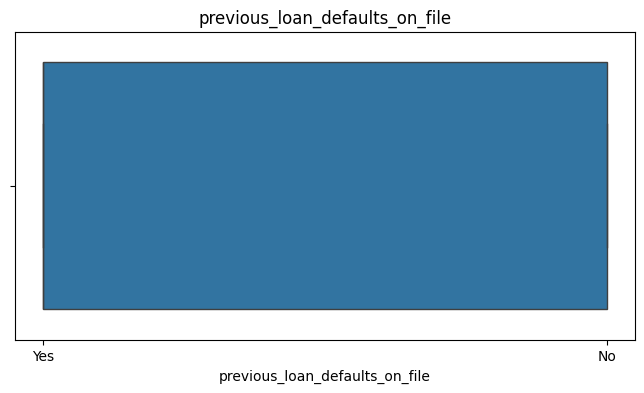

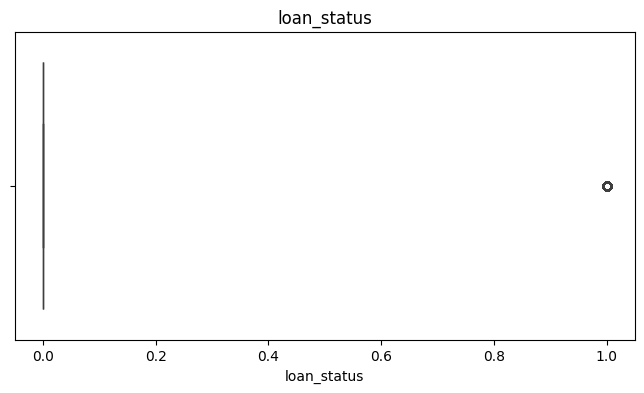

In [14]:
columns = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score",
    "previous_loan_defaults_on_file",
    "loan_status"
]

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1_cleaned[col], orient='h')
    plt.title(col)
    plt.show()


In [15]:
df1_cleaned

,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,12282.0,0,1000.0,0.08,2.0,504,Yes,0
5,21.0,12951.0,0,2500.0,0.19,2.0,532,No,1
9,21.0,12739.0,0,1600.0,0.13,3.0,640,No,1
19,24.0,14283.0,1,1750.0,0.12,2.0,679,No,1
23,24.0,13866.0,0,1500.0,0.11,3.0,600,Yes,0
...,...,...,...,...,...,...,...,...,...
44990,31.0,136832.0,9,12319.0,0.09,7.0,722,No,1
44993,27.0,35512.0,4,5000.0,0.14,5.0,505,No,1
44995,27.0,47971.0,6,15000.0,0.31,3.0,645,No,1
44997,33.0,56942.0,7,2771.0,0.05,10.0,668,No,1


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()

In [18]:
df2 = df1_cleaned.copy()

In [19]:
df2['previous_loan_defaults_on_file'] = lb.fit_transform(df2['previous_loan_defaults_on_file'])

In [20]:
df2.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,12282.0,0,1000.0,0.08,2.0,504,1,0
5,21.0,12951.0,0,2500.0,0.19,2.0,532,0,1
9,21.0,12739.0,0,1600.0,0.13,3.0,640,0,1
19,24.0,14283.0,1,1750.0,0.12,2.0,679,0,1
23,24.0,13866.0,0,1500.0,0.11,3.0,600,1,0


In [21]:
X = df2.drop(columns=['loan_status'])
y = df2['loan_status']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [30]:
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8479


In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5745
           1       0.63      0.63      0.63      1482

    accuracy                           0.85      7227
   macro avg       0.77      0.77      0.77      7227
weighted avg       0.85      0.85      0.85      7227



In [32]:
sample_input = {
    "person_age": 35,
    "person_income": 80000,
    "person_emp_exp": 7,
    "loan_amnt": 25000,
    "loan_percent_income": 0.3,
    "cb_person_cred_hist_length": 8,
    "credit_score": 750,
    "previous_loan_defaults_on_file": 0  
}

In [33]:
sample_df = pd.DataFrame([sample_input])

In [34]:
prediction = clf.predict(sample_df)

In [35]:
prediction

array([1])

In [36]:
print("Predicted Loan Status:", "Approved" if prediction[0] == 1 else "Rejected")

Predicted Loan Status: Approved
